In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Use the dataframe was cleaned before
df = pd.read_csv('df_clean.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,product_id,customer_id,full_name,created_time,rating,content,new_content,count_positive,count_negative,output
0,10119100,NguyenCatTuong,Nguyễn Cát Tường,20:22 | 21/12/2018,4,Shop phục vụ khá tốt.,cửa tiệm phục_vụ tốt,2,0,Positive
1,10119100,VuPhuong,Vũ Phương,15:00 | 10/12/2018,3,Sản phẩm gần giống mô tả,sản_phẩm,1,0,Neutral
2,10119490,lienla,liên la,16:43 | 06/02/2021,5,Giao hàng nhanh bất ngờ.,giao hàng nhanh_chóng,2,0,Positive
3,10119490,DoanHanh,Đoàn Hạnh,22:06 | 19/07/2020,4,Sản phẩm/dịch vụ giống mô tả.,sản_phẩm dịch_vụ,1,1,Positive
4,10119490,Phamthuhoai,Phạm thu hoài,11:57 | 26/08/2019,5,Sản phẩm/dịch vụ giống mô tả và tốt hơn mong đ...,sản_phẩm dịch_vụ tốt mong_đợi chất_lượng s...,8,2,Positive


In [ ]:
# Create the vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=0.02)

In [ ]:
# Fit the vectorizer on the data
vectorizer.fit(df['new_content'])

TfidfVectorizer(min_df=0.02, ngram_range=(1, 2))

In [ ]:
# Transform the data
X = vectorizer.transform(df['new_content'])

In [ ]:
df_new = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
df_new.head()

,bé,bỉm,chuyên_nghiệp,chuyên_nghiệp thân_thiện,chất_lượng,chất_lượng sản_phẩm,chất_lượng tuyệt_vời,chất_lượng tốt,cửa,cửa tiệm,...,vé dịch_vụ,vải,đóng_gói,đóng_gói kỹ_lưỡng,đẹp,đẹp chất_lượng,đẹp giá,đẹp đóng_gói,đồng_ý,ủng_hộ
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.536870,0.537366,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.107581,0.154657,0.0,0.0,0.136815,0.136941,...,0.153697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_new.shape

(5234, 61)

In [ ]:
df_new = pd.concat([df_new, df[['count_positive','count_negative']]], axis=1)

In [ ]:
le = LabelEncoder()
df['output_le'] = le.fit_transform(df['output'])

In [ ]:
X = df_new
y = df['output_le']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
y_train.value_counts()

2    3537
0     251
1     137
Name: output_le, dtype: int64

### Data is imbalanced, we handle it in two ways: UnderSampling and OverSampling

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
y_train_smote.value_counts()

2    3537
1    3537
0    3537
Name: output_le, dtype: int64

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [ ]:
y_train_rus.value_counts()

0    137
1    137
2    137
Name: output_le, dtype: int64

## Model Selection

In [ ]:
# Logistic Regression, Naive Bayes, KNN, Decision Tree, RandomForest, SVM, AdaBoost
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

In [ ]:
#Create a list of models
models = [
    LogisticRegression(max_iter=1000),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=10),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=50),
    ExtraTreesClassifier(n_estimators=50),
    AdaBoostClassifier(n_estimators=50),
    XGBClassifier(n_estimators=50),
    SVC(kernel='linear'),
    SVC(kernel='poly',degree=3),
]

In [ ]:
# Create a function to distinguish the models
def get_model_name(model):
    model_name=model.__class__.__name__ #lấy tên của lớp mà đối tượng đó thuộc về
    if model_name=='KNeighborsClassifier':
        model_name=model_name+'_'+str(model.n_neighbors)
    elif model_name=='RandomForestClassifier':
        model_name=model_name+'_'+str(model.n_estimators)
    elif model_name=='SVC':
        model_name=model_name+'_'+model.kernel
    return model_name

### UnderSampling

In [ ]:
# Number of cross validation
kf = 10

# Dataframe to store the model selection results
cv_df1 = pd.DataFrame(columns=['model', 'mean_score', 'std_score', 'accuracy_train', 'accuracy_test', 'time'])

# Loop through the models
for model in models:
    # Get the model name
    model_name = get_model_name(model)
    print(model_name)
    # Get the start time
    start_time = datetime.now()
    # Get the cross validation score for the model
    cv_score = cross_val_score(model, X_train_rus, y_train_rus, cv=kf, n_jobs=-1)
    # Get the end time
    end_time = datetime.now()
    # Get the time taken to train the model
    time_taken = end_time - start_time
    # Get the accuracy score for the model
    model.fit(X_train_rus, y_train_rus)
    accuracy_train = round(model.score(X_train_rus, y_train_rus) * 100, 3)
    accuracy_test = round(model.score(X_test, y_test) * 100, 3)
    # Append the model name and score to the dataframe
    cv_df1 = pd.concat([cv_df1, pd.DataFrame.from_records([  #cv_df = cv_df.append(
        {
            'model': model_name,
            'mean_score': cv_score.mean(),
            'std_score': cv_score.std(),
            'accuracy_train': accuracy_train,
            'accuracy_test': accuracy_test,
            'time': str(time_taken),
        }])],
                      ignore_index=True,

                      )

LogisticRegression
GaussianNB
KNeighborsClassifier_10
DecisionTreeClassifier
RandomForestClassifier_50
ExtraTreesClassifier
AdaBoostClassifier
XGBClassifier
SVC_linear
SVC_poly


In [ ]:
cv_df1['different_train_test'] = cv_df1['accuracy_train'] - cv_df1['accuracy_test']

In [ ]:
metrics1 = cv_df1.sort_values(by='mean_score', ascending=False)
metrics1.style.background_gradient(cmap='Blues')

,model,mean_score,std_score,accuracy_train,accuracy_test,time,different_train_test
5,ExtraTreesClassifier,0.734785,0.075927,94.404000,84.186000,0:00:00.664765,10.218000
7,XGBClassifier,0.732172,0.068630,93.431000,85.409000,0:00:02.123001,8.022000
4,RandomForestClassifier_50,0.710337,0.068924,94.404000,83.804000,0:00:00.867152,10.600000
3,DecisionTreeClassifier,0.708014,0.052353,94.404000,83.499000,0:00:00.088314,10.905000
0,LogisticRegression,0.698142,0.048532,75.426000,84.721000,0:00:03.937467,-9.295000
8,SVC_linear,0.681127,0.046317,74.453000,80.978000,0:00:00.160706,-6.525000
1,GaussianNB,0.637573,0.059418,65.450000,73.950000,0:00:00.076097,-8.500000
2,KNeighborsClassifier_10,0.629907,0.059675,68.856000,65.775000,0:00:00.141414,3.081000
6,AdaBoostClassifier,0.608362,0.097389,72.263000,79.908000,0:00:00.981254,-7.645000
9,SVC_poly,0.528165,0.059106,55.718000,54.851000,0:00:00.145199,0.867000


We selected the XGBClassifier because it achieved the highest accuracy_test, and the difference between accuracy on the training and test data is minimal, indicating that the model is not overfitting. Additionally, the model runs quickly, completing in just 2 seconds.

In [ ]:
model1 = XGBClassifier(n_estimators=50)
model1.fit(X_train_rus, y_train_rus)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred_rus = model1.predict(X_test)

#### Class 0: Negative
#### Class 1: Neutral
#### Class 2: Positive



In [ ]:
cm1 = confusion_matrix(y_test,y_pred_rus)

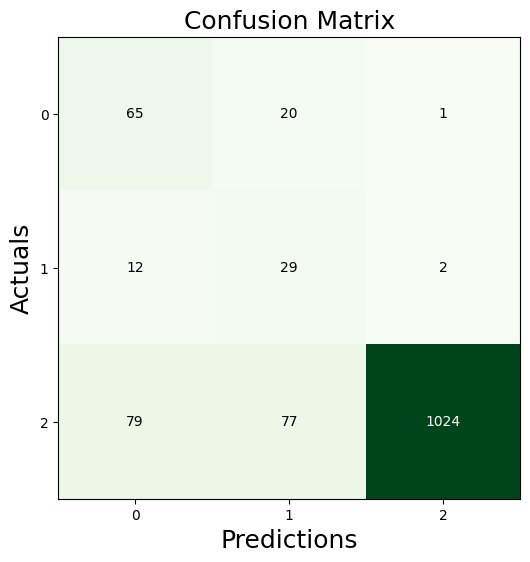

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm1, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_rus))

              precision    recall  f1-score   support

           0       0.42      0.76      0.54        86
           1       0.23      0.67      0.34        43
           2       1.00      0.87      0.93      1180

    accuracy                           0.85      1309
   macro avg       0.55      0.77      0.60      1309
weighted avg       0.93      0.85      0.88      1309



#### Based on the results, we see that the precision of the two classes 0, 1 is quite low, recall is only average => the model is not suitable

### OverSampling

In [ ]:
# Number of cross validation
kf = 10

# Dataframe to store the model selection results
cv_df2 = pd.DataFrame(columns=['model', 'mean_score', 'std_score', 'accuracy_train', 'accuracy_test', 'time'])

# Loop through the models
for model in models:
    # Get the model name
    model_name = get_model_name(model)
    print(model_name)
    # Get the start time
    start_time = datetime.now()
    # Get the cross validation score for the model
    cv_score = cross_val_score(model, X_train_smote, y_train_smote, cv=kf, n_jobs=-1)
    # Get the end time
    end_time = datetime.now()
    # Get the time taken to train the model
    time_taken = end_time - start_time
    # Get the accuracy score for the model
    model.fit(X_train_smote, y_train_smote)
    accuracy_train = round(model.score(X_train_smote, y_train_smote) * 100, 3)
    accuracy_test = round(model.score(X_test, y_test) * 100, 3)
    # Append the model name and score to the dataframe
    cv_df2 = pd.concat([cv_df2, pd.DataFrame.from_records([  #cv_df = cv_df.append(
        {
            'model': model_name,
            'mean_score': cv_score.mean(),
            'std_score': cv_score.std(),
            'accuracy_train': accuracy_train,
            'accuracy_test': accuracy_test,
            'time': str(time_taken),
        }])],
                      ignore_index=True,

                      )

LogisticRegression
GaussianNB
KNeighborsClassifier_10
DecisionTreeClassifier
RandomForestClassifier_50
ExtraTreesClassifier
AdaBoostClassifier
XGBClassifier
SVC_linear
SVC_poly


In [ ]:
cv_df2['different_train_test'] = cv_df2['accuracy_train'] - cv_df2['accuracy_test']

In [ ]:
metrics2 = cv_df2.sort_values(by='mean_score', ascending=False)
metrics2.style.background_gradient(cmap='Blues')

,model,mean_score,std_score,accuracy_train,accuracy_test,time,different_train_test
5,ExtraTreesClassifier,0.945626,0.014236,96.965000,89.228000,0:00:09.873431,7.737000
4,RandomForestClassifier_50,0.944118,0.015731,96.956000,89.076000,0:00:05.147334,7.880000
7,XGBClassifier,0.936202,0.015083,94.751000,89.152000,0:00:55.364550,5.599000
3,DecisionTreeClassifier,0.934696,0.021121,96.965000,88.388000,0:00:02.247613,8.577000
2,KNeighborsClassifier_10,0.866085,0.011639,87.881000,85.180000,0:00:01.375628,2.701000
8,SVC_linear,0.793707,0.013408,79.455000,85.714000,0:00:55.673407,-6.259000
0,LogisticRegression,0.787488,0.015621,78.843000,86.555000,0:00:15.365977,-7.712000
6,AdaBoostClassifier,0.780421,0.019326,79.776000,86.402000,0:00:09.196892,-6.626000
1,GaussianNB,0.729057,0.014126,72.924000,81.818000,0:00:00.364593,-8.894000
9,SVC_poly,0.679014,0.011855,68.938000,65.393000,0:01:00.643041,3.545000


We selected the ExtraTreesClassifier because of its accuracy_test is the highest, and the difference between accuracy on the training and test data is low. Additionally, the model is not overfitting, runs quickly and completing in just 9 seconds.

In [ ]:
model2 = ExtraTreesClassifier()
model2.fit(X_train_smote, y_train_smote)

ExtraTreesClassifier()

In [ ]:
y_pred_smote = model2.predict(X_test)

#### Class 0: Negative
#### Class 1: Neutral
#### Class 2: Positive



In [ ]:
cm2 = confusion_matrix(y_test,y_pred_smote)

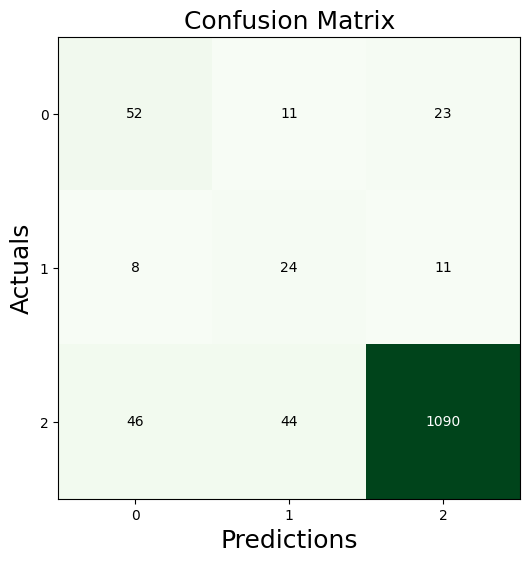

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm2, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       0.49      0.60      0.54        86
           1       0.30      0.56      0.39        43
           2       0.97      0.92      0.95      1180

    accuracy                           0.89      1309
   macro avg       0.59      0.70      0.63      1309
weighted avg       0.92      0.89      0.90      1309



#### Based on the results, we observed a slight improvement in the precision of class 0, 1 compared to Undersampling, but both remain relatively low. Recall is still only at an average level, indicating that model 2 has not shown significant improvement over model 1.

### Conclusion
#### Using the dataframe was pre-processed before to build model
- Output includes 3 class Positive (rating 4,5), Negative (rating 1,2) và Neutral (rating 3)
- Input comprises new_content, count_positive, count_negative columns
#### Due to data imbalance, the model should be built after handling imbalanced data in two directions: UnderSampling and OverSampling:
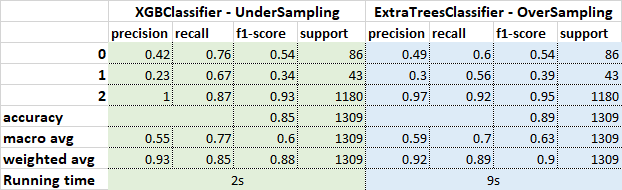
#### Both methods yield low precision for class 0 and 1, and recall remains only at an average level. Despite addressing data imbalance, the model's performance has not significantly improved => Need to collect more data